# Random Over-sampling

Random over-sampling trích xuất ngẫu nhiên các mẫu của lớp thiểu số cho đến khi đạt được một tỷ lệ nhất định so với lớp đa số, thường là 50:50 hay tỷ lệ cân bằng là 1.

Trong Random Random over-sampling, chúng ta trích xuất ngẫu nhiên các mẫu của lớp thiểu số có hoàn trả.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import RandomOverSampler

## Tạo dữ liệu

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

Chúng ta sẽ tạo 2 lớp: 1 lớp đa số và 1 lớp thiểu số, được phân tách rõ ràng để dễ minh họa.

In [2]:
# Tùy chọn cấu hình
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Tạo X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# biến đổi mảng thành định dạng của pandas
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# tạo một tập dữ liệu X mất cân bằng
# (khiến blob tạo số lượng quan sát tương tự ở mỗi lớp
# mà chúng ta cần để giảm mẫu theo cách thủ công)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# hiển thị kích thước
X.shape, y.shape

((1000, 2), (1000,))

In [3]:
X.head()

,VarA,VarB
3,0.336213,2.370579
6,0.589903,-1.483281
7,-0.392832,0.532289
9,1.690688,0.965156
10,-0.463833,3.092732


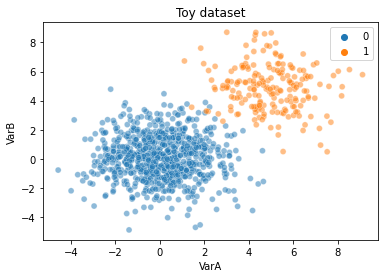

In [4]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Random Over-sampling

[RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)


Chọn ngẫu nhiên các mẫu từ lớp thiểu số có hoàn trả cho tới khi số lượng quan sát của lớp thiểu số bằng số lượng quan sát trong lớp đa số (hay bất kỳ tỷ lệ cân bằng nào nếu muốn).

In [5]:
## Yêu cầu 1:
## VIẾT CODE Ở ĐÂY:
ros = RandomOverSampler(
    sampling_strategy='auto', # chỉ lấy mẫu lớp thiểu số
    random_state=0,  # khả năng tái lặp
)  

X_res, y_res = ros.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[RandomOverSampler()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)

</details>

In [6]:
# kích thước dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# kích thước dữ liệu undersampled

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [8]:
# số lượng quan sát của lớp thiểu số

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    800
 dtype: int64)

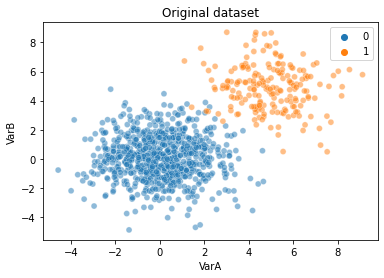

In [9]:
# biểu đồ dữ liệu ban đầu
## Yêu cầu 2:
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

<details><summary> Gợi ý </summary>

[scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

</details>

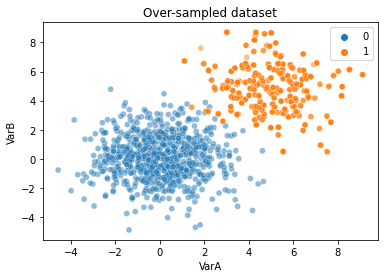

In [10]:
# biểu đồ dữ liệu đã chọn
## Yêu cầu 3:
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

<details><summary> Gợi ý </summary>

[scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

</details>

Chúng ta không thấy có nhiều quan sát của lớp thiểu số hơn vì chúng giống hệt với các quan sát khác nên chúng được vẽ ở phía trên. Chúng ta nhận thấy có nhiều hơn do màu cam đậm hơn.

**BÀI TẬP**

- Kiểm tra Random Over-sampling trong một tập dữ liệu từ imbalanced-learn và tạo một số biểu đồ của các biến làm nổi bật lớp thiểu số, để hiển thị kết quả tốt hơn.

- Thay đổi tham số strategy ở notebook hiện tại để thu được các tỷ lệ khác nhau của lớp thiểu số.

In [37]:
from imblearn.datasets import fetch_datasets

dataset_name = 'ecoli'
data = fetch_datasets()[dataset_name]
X = data.data
y = data.target

In [38]:
X = pd.DataFrame(X)
y = pd.Series(y)

In [39]:
X.head(2)

,0,1,2,3,4,5,6
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44


In [43]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=0)
X_res, y_res = ros.fit_resample(X, y)

Text(0.5, 1.0, 'Over-sampled dataset')

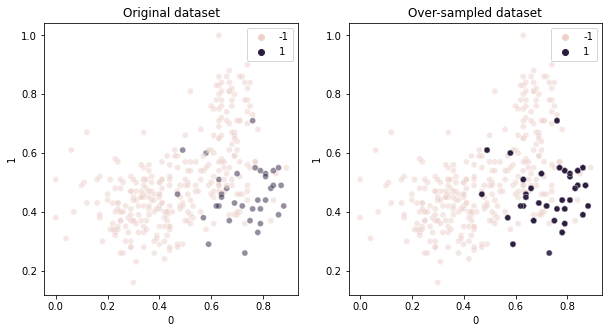

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax0 = sns.scatterplot(data=X, x=0, y=1, hue=y, ax=ax[0], alpha=0.5)
ax0.set_title('Original dataset')
ax1 = sns.scatterplot(data=X_res, x=0, y=1, hue=y_res, ax=ax[1], alpha=0.5)
ax1.set_title('Over-sampled dataset')


In [45]:
y_res.value_counts()

-1    301
 1    301
dtype: int64

- '**minority**': resample only lớp thiểu số;
- '**not minority**': resample all classes ngoại trừ lớp thiểu số;
- '**not majority**': resample all classes ngoại trừ lớp đa số;
- '**all**': resample all classes;
- '**auto**': equivalent to 'not majority'. # không phải lớp đa số

Class minority: -1    301
 1    301
dtype: int64
Class not minority: -1    301
 1     35
dtype: int64
Class all: -1    301
 1    301
dtype: int64
Class auto: -1    301
 1    301
dtype: int64
Class not majority: -1    301
 1    301
dtype: int64


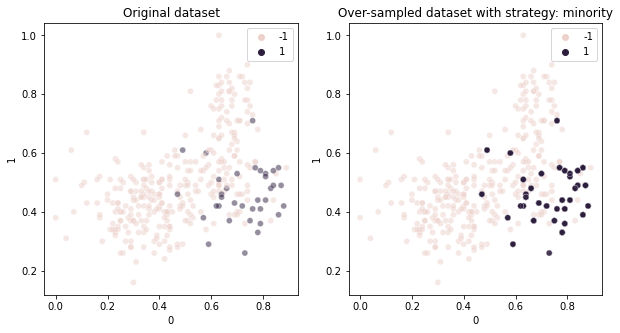

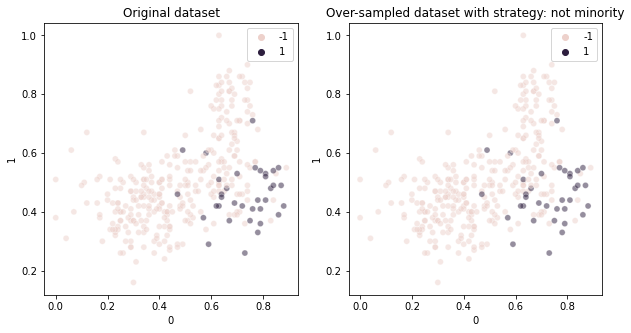

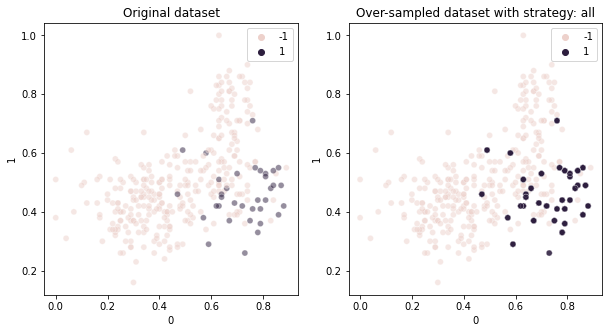

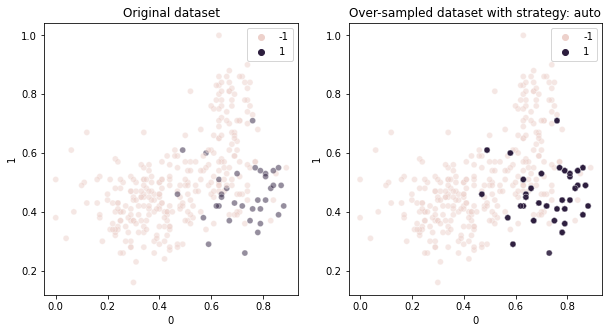

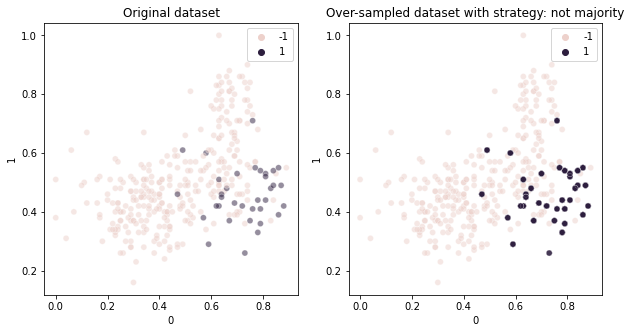

In [47]:
strategies = ['minority', 'not minority', 'all', 'auto', 'not majority']

for strategy in strategies:
    ros = RandomOverSampler(sampling_strategy=strategy, random_state=0)
    X_res, y_res = ros.fit_resample(X, y)
    print(f'Class {strategy}: {y_res.value_counts()}')
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax0 = sns.scatterplot(data=X, x=0, y=1, hue=y, ax=ax[0], alpha=0.5)
    ax0.set_title('Original dataset')
    ax1 = sns.scatterplot(data=X_res, x=0, y=1, hue=y_res, ax=ax[1], alpha=0.5)
    ax1.set_title('Over-sampled dataset with strategy: {}'.format(strategy))
